In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('../DATA/energydata_complete.csv', index_col='date')

In [5]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [12]:
df.index = pd.to_datetime(df.index)

In [13]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [15]:
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<Axes: xlabel='date'>

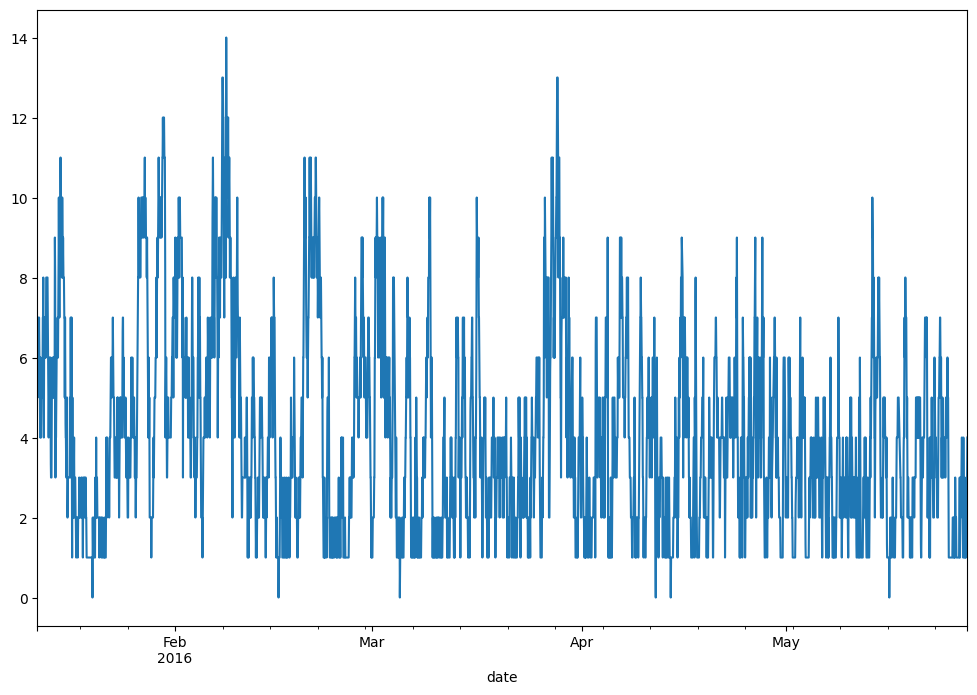

In [23]:
df['Windspeed'].plot(figsize=(12,8))

<Axes: xlabel='date'>

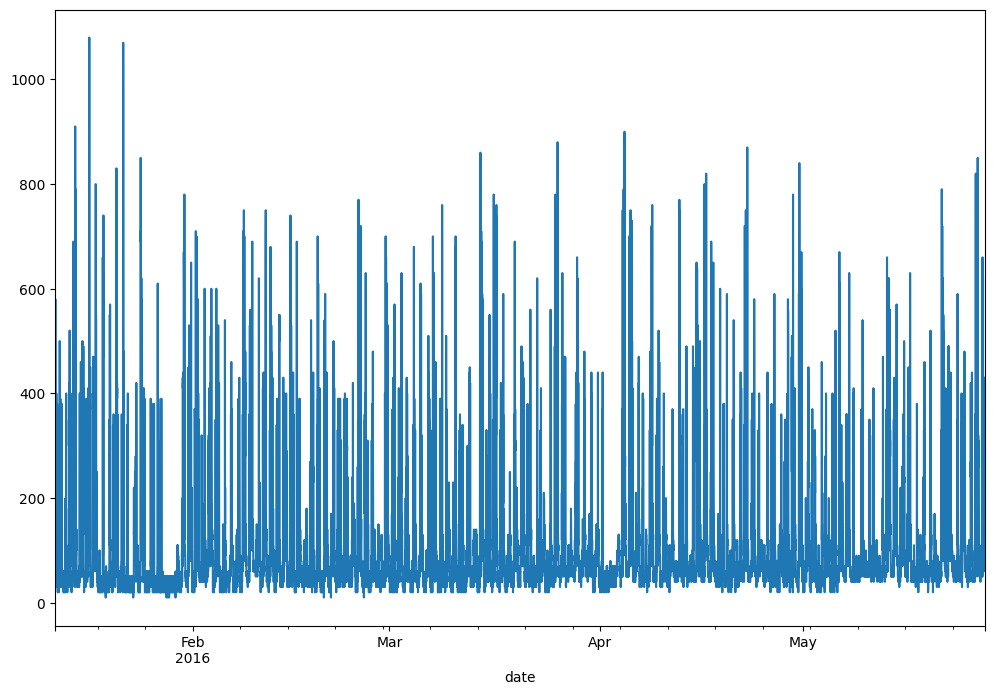

In [24]:
df['Appliances'].plot(figsize=(12,8))

In [25]:
len(df)

19735

# To save a bit of training time, we are grabbing only the last month since we are only forecasting 24hrs into the future

In [27]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.73,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.70,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.70,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.70,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.70,45.590000,...,23.200000,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.70,45.590000,...,23.200000,46.790000,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.70,45.730000,...,23.200000,46.790000,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [28]:
df = df.loc['2016-05-01':]

In [29]:
df = df.round(2)

In [30]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.57,46.56,25.89,42.03,27.20,41.16,24.70,45.59,...,23.20,46.79,22.73,755.20,55.67,3.33,23.67,13.33,43.10,43.10
2016-05-27 17:30:00,90,0,25.50,46.50,25.75,42.08,27.13,41.22,24.70,45.59,...,23.20,46.79,22.60,755.20,56.00,3.50,24.50,13.30,49.28,49.28
2016-05-27 17:40:00,270,10,25.50,46.60,25.63,42.77,27.05,41.69,24.70,45.73,...,23.20,46.79,22.47,755.20,56.33,3.67,25.33,13.27,29.20,29.20


In [31]:
len(df)

3853

In [32]:
# How many rows occur per day, we know the data occurs every 10 mins

24 * 60 /10

144.0

In [33]:
test_days = 2

In [34]:
test_ind = test_days * 144

In [35]:
test_ind

288

In [36]:
train = df.iloc[:-288]
test = df.iloc[-288:]

In [38]:
train

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.20,38.20,18.39,41.40,23.20,36.40,19.73,37.73,...,19.17,38.20,4.30,763.70,86.00,2.00,40.00,2.20,15.31,15.31
2016-05-01 00:10:00,60,0,21.15,38.17,18.39,41.50,23.13,36.47,19.70,37.66,...,19.13,38.29,4.28,763.72,86.33,2.17,38.17,2.22,11.24,11.24
2016-05-01 00:20:00,50,0,21.13,38.09,18.32,41.50,23.20,36.50,19.70,37.59,...,19.13,38.36,4.27,763.73,86.67,2.33,36.33,2.23,21.81,21.81
2016-05-01 00:30:00,50,0,21.10,38.09,18.29,41.50,23.20,36.50,19.70,37.50,...,19.17,38.50,4.25,763.75,87.00,2.50,34.50,2.25,47.00,47.00
2016-05-01 00:40:00,60,0,21.10,38.03,18.29,41.56,23.20,36.50,19.70,37.50,...,19.17,38.63,4.23,763.77,87.33,2.67,32.67,2.27,8.06,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-25 17:20:00,120,0,24.50,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.50,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.50,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [44]:
length = 144
batch_size = 1
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(data=scaled_train, targets=scaled_train, batch_size=batch_size, length=length)
test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(data=scaled_test, targets=scaled_test, batch_size=batch_size, length=length)

In [45]:
len(scaled_train)

3565

In [46]:
len(train_generator)

3421

In [47]:
x, y = train_generator[0]

In [48]:
x

array([[[0.03896104, 0.        , 0.13798978, ..., 0.21301775,
         0.30618371, 0.30618371],
        [0.05194805, 0.        , 0.12947189, ..., 0.21420118,
         0.22473484, 0.22473484],
        [0.03896104, 0.        , 0.12606474, ..., 0.2147929 ,
         0.43626176, 0.43626176],
        ...,
        [0.05194805, 0.        , 0.32367973, ..., 0.15680473,
         0.43406044, 0.43406044],
        [0.05194805, 0.        , 0.30834753, ..., 0.14970414,
         0.64078447, 0.64078447],
        [0.03896104, 0.        , 0.30834753, ..., 0.14319527,
         0.75185111, 0.75185111]]])

In [49]:
y

array([[0.03896104, 0.        , 0.30834753, 0.29439421, 0.16038492,
        0.49182278, 0.0140056 , 0.36627907, 0.24142857, 0.24364791,
        0.12650602, 0.36276002, 0.12      , 0.28205572, 0.06169297,
        0.15759185, 0.34582624, 0.39585974, 0.09259259, 0.39649608,
        0.18852459, 0.96052632, 0.59210526, 0.1       , 0.58333333,
        0.13609467, 0.4576746 , 0.4576746 ]])

In [52]:
len(y[0])

28

In [53]:
num_feat = 28

In [50]:
layers = tf.keras.layers

In [54]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(length,num_feat)),
    layers.LSTM(100, activation='relu'),
    layers.Dense(num_feat),
])

model.compile(loss='mse', optimizer='adam')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               51600     
                                                                 
 dense (Dense)               (None, 28)                2828      
                                                                 
Total params: 54428 (212.61 KB)
Trainable params: 54428 (212.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [57]:
model.fit(train_generator, validation_data=test_generator, epochs=10, callbacks=[early_stopping])

Epoch 1/10

3421/3421 [==============================] - 175s 50ms/step - loss: 0.0132 - val_loss: 0.0120
Epoch 2/10
3421/3421 [==============================] - 175s 51ms/step - loss: 0.0086 - val_loss: 0.0097
Epoch 3/10
3421/3421 [==============================] - 159s 47ms/step - loss: 0.0079 - val_loss: 0.0097
Epoch 4/10
3421/3421 [==============================] - 179s 52ms/step - loss: 0.0076 - val_loss: 0.0086
Epoch 5/10
3421/3421 [==============================] - 160s 47ms/step - loss: 0.0074 - val_loss: 0.0090
Epoch 6/10
3421/3421 [==============================] - 164s 48ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 7/10
3421/3421 [==============================] - 161s 47ms/step - loss: 0.0073 - val_loss: 0.0087


In [58]:
eval = scaled_train[-length:].reshape(1, length, num_feat)

In [59]:
model.predict(eval)

1/1 [==============================] - 0s 285ms/step


array([[0.08779335, 0.00554225, 0.69501597, 0.40869707, 0.5679008 ,
        0.44778654, 0.41459557, 0.42000955, 0.7132628 , 0.41142315,
        0.2720304 , 0.39409858, 0.63480365, 0.00391407, 0.6352521 ,
        0.39217207, 0.55809706, 0.31540546, 0.5536381 , 0.32337478,
        0.62311405, 0.5579087 , 0.4336816 , 0.19391216, 0.6115236 ,
        0.54538774, 0.5226774 , 0.5233955 ]], dtype=float32)

In [60]:
scaled_test[0]

array([0.19480519, 0.        , 0.70017036, 0.3920434 , 0.53007217,
       0.41064526, 0.40616246, 0.41913319, 0.72714286, 0.4115245 ,
       0.30722892, 0.36445121, 0.66777778, 0.        , 0.61119082,
       0.39840637, 0.51618399, 0.32953105, 0.53703704, 0.34024896,
       0.6057377 , 0.52631579, 0.41881579, 0.2       , 0.55283333,
       0.53372781, 0.76305783, 0.76305783])

In [133]:
test_predictions = []
eval = scaled_train[-length:].reshape(1, length, num_feat)

for _ in range(len(test)):
    pred = model.predict(eval)
    test_predictions.append(pred[0])
    eval = np.append(eval[:,1:,:], [pred], axis=1)

1/1 [==============================] - 0s 39ms/step


In [134]:
test_predictions = scaler.inverse_transform(test_predictions)

In [135]:
test_predictions

array([[87.60087967,  0.16626762, 24.46974373, ...,  7.81705289,
        26.12819076, 26.16407207],
       [72.0429562 ,  0.19471999, 24.53692789, ...,  8.0276983 ,
        26.8562178 , 26.85020433],
       [64.17449236,  0.30726923, 24.5895039 , ...,  8.24591269,
        27.43778284, 27.44258112],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [125]:
train.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 17:20:00,120,0,24.5,37.22,24.13,34.30,25.20,37.64,24.36,38.29,...,21.89,37.03,16.17,756.17,52.67,1.33,31.33,6.43,33.46,33.46
2016-05-25 17:30:00,190,0,24.5,37.16,24.10,34.30,25.20,37.55,24.29,38.16,...,21.89,37.20,16.25,756.15,53.50,1.50,33.50,6.75,0.43,0.43
2016-05-25 17:40:00,160,0,24.5,37.43,24.10,34.43,25.14,37.28,24.29,38.00,...,21.89,37.33,16.33,756.13,54.33,1.67,35.67,7.07,16.67,16.67
2016-05-25 17:50:00,90,0,24.5,37.63,24.03,34.43,25.10,36.99,24.29,37.93,...,22.00,37.36,16.42,756.12,55.17,1.83,37.83,7.38,39.36,39.36
2016-05-25 18:00:00,100,0,24.5,38.00,24.00,34.40,25.10,36.73,24.29,37.86,...,22.00,37.36,16.50,756.10,56.00,2.00,40.00,7.70,38.63,38.63


In [126]:
test_predictions_ind = pd.date_range(start='2016-05-25 18:10:00', freq='10min', periods=288)

In [127]:
test_predictions_ind

DatetimeIndex(['2016-05-25 18:10:00', '2016-05-25 18:20:00',
               '2016-05-25 18:30:00', '2016-05-25 18:40:00',
               '2016-05-25 18:50:00', '2016-05-25 19:00:00',
               '2016-05-25 19:10:00', '2016-05-25 19:20:00',
               '2016-05-25 19:30:00', '2016-05-25 19:40:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', length=288, freq='10min')

In [128]:
test_predictions = pd.DataFrame(test_predictions, columns=['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'], index=test_predictions_ind)

In [129]:
test_predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
2016-05-25 18:10:00,87.600880,0.166268,24.469744,38.320474,24.471723,35.519061,25.060212,36.716581,24.192840,37.787766,...,22.089646,36.863999,16.903983,756.820319,56.959802,1.939122,41.691418,7.817053,26.128191,26.164072
2016-05-25 18:20:00,72.042956,0.194720,24.536928,38.645106,24.608579,35.799656,25.061695,36.682167,24.282648,38.005014,...,22.209648,36.749437,16.722993,757.594041,58.841617,1.808096,44.131724,8.027698,26.856218,26.850204
2016-05-25 18:30:00,64.174492,0.307269,24.589504,38.941135,24.711399,36.016921,25.056608,36.632238,24.364342,38.258658,...,22.304487,36.662808,16.494437,758.348738,60.525953,1.661412,46.358919,8.245913,27.437783,27.442581
2016-05-25 18:40:00,59.877883,0.468208,24.635952,39.254162,24.795920,36.249674,25.046535,36.543082,24.448453,38.513165,...,22.390389,36.621938,16.295556,759.074655,62.105860,1.510698,48.423169,8.467246,27.983344,28.001048
2016-05-25 18:50:00,56.953661,0.634180,24.679262,39.576111,24.870432,36.496633,25.030937,36.419284,24.532262,38.769860,...,22.473612,36.605025,16.139863,759.779672,63.567536,1.358904,50.370728,8.695295,28.496358,28.540459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-27 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-27 17:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-27 17:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
test['Appliances']

date
2016-05-25 18:10:00    170
2016-05-25 18:20:00    310
2016-05-25 18:30:00    120
2016-05-25 18:40:00    120
2016-05-25 18:50:00    120
                      ... 
2016-05-27 17:20:00    100
2016-05-27 17:30:00     90
2016-05-27 17:40:00    270
2016-05-27 17:50:00    420
2016-05-27 18:00:00    430
Name: Appliances, Length: 288, dtype: int64

In [131]:
test_predictions['Appliances']

2016-05-25 18:10:00    87.600880
2016-05-25 18:20:00    72.042956
2016-05-25 18:30:00    64.174492
2016-05-25 18:40:00    59.877883
2016-05-25 18:50:00    56.953661
                         ...    
2016-05-27 17:20:00          NaN
2016-05-27 17:30:00          NaN
2016-05-27 17:40:00          NaN
2016-05-27 17:50:00          NaN
2016-05-27 18:00:00          NaN
Freq: 10min, Name: Appliances, Length: 288, dtype: float64